In [45]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt     
import common_lib
import importlib
importlib.reload(common_lib)
from common_lib.util import rgb_to_hsv

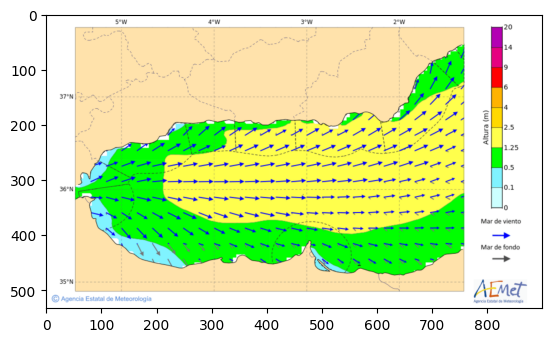

In [42]:
img = cv.imread('../img/aemet-yellow.png', cv.IMREAD_COLOR)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

[ 15  42 215] [ 25 122 255]


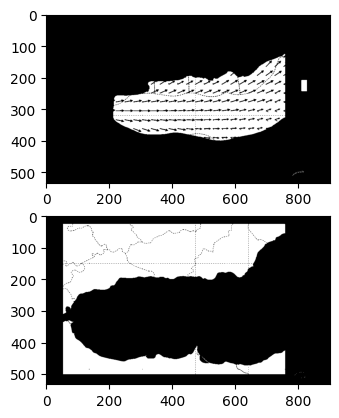

In [67]:

def create_hsv_bounds(hsv, h_delta=10, s_delta=50, v_delta=50):
    h, s, v = hsv[0, 0].astype(np.int16) # unpacking the array. rembber it's triple nested
    lower_bound = np.array([max(h - h_delta,0), max(s - s_delta,0), max(v - v_delta,0)]).astype(np.uint8)
    upper_bound = np.array([min(h + h_delta,179), min(s + s_delta,255), min(v + v_delta,255)]).astype(np.uint8)
    # lower_bound = np.array([15, 60, 200])  # Adjusted lower bounds (narrower)
    # upper_bound = np.array([25, 120, 255])
    return lower_bound, upper_bound

def rgb_to_hsv(rgb: list) -> np.ndarray:
    source = np.array(rgb, dtype=np.uint8).reshape(1, 1, 3)
    return cv.cvtColor(source, cv.COLOR_RGB2HSV)

yellow_rgb = (255, 255, 110)
beige_rgb = (255, 227, 173)

y_hsv = rgb_to_hsv(yellow_rgb)
b_hsv = rgb_to_hsv(beige_rgb)
y_lo, y_hi = create_hsv_bounds(y_hsv, 10)
b_lo, b_hi = create_hsv_bounds(b_hsv, 5,40,40 )

print(b_lo, b_hi)

mask_y = cv.inRange(cv.cvtColor(img, cv.COLOR_BGR2HSV), y_lo, y_hi)
mask_b = cv.inRange(cv.cvtColor(img, cv.COLOR_BGR2HSV), b_lo, b_hi)
# img = cv.bitwise_and(img, img, mask=mask)
fig, axes = plt.subplots(1,2)

axes[0].imshow(mask_y, cmap='gray')
axes[1].imshow(mask_b, cmap='gray')
plt.show()
# plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))